In [28]:
import numpy as np
# --------------------------------------------------------------------------------------
# ------------------------------------------ Q1 ----------------------------------------
# calculate the solution of the linear system Ax=b
a = np.asarray([[1,2],[1.0001, 2]])
b = [3, 3.0001]
x = np.linalg.solve(a,b)
print('the solution of the original system Ax=b is: x0: %.5f x1: %.5f' % (x[0],x[1]))

the solution of the original system Ax=b is: x0: 1.00000 x1: 1.00000


In [29]:
# calculate the solution of \hat{A}x=b
a_perturb = np.asarray([[1,2],[0.9999, 2]])
x_perturb = np.linalg.solve(a_perturb,b)
print('the solution of the perturbed system \hat{A}x=b is: x0: %.5f x1: %.5f'
      % (x_perturb[0],x_perturb[1]))

the solution of the perturbed system \hat{A}x=b is: x0: -1.00000 x1: 2.00000


In [30]:
# caluclate the condition number of A by using 
# the definition shown in 6.91.
def norm_a(a):
    re_norm = 0.0
    for i in range(len(a)):
        re_norm += np.max(a[:,i])
    return re_norm
def inverse_a(mat):
    a,b,c,d = mat[0,0],mat[0,1],mat[1,0],mat[1,1]
    return 1./(a*d-b*c) * np.asarray([[d,-b],[-c, a]])
a = np.asarray([[1,2],[1.0001, 2]])
print(norm_a(a) * norm_a(inverse_a(a)))

45003.00005000495


In [31]:
# caluclate the condition number of A by using 
# its maximal eigenvalue and minimal eigenvalue.
w,_ = np.linalg.eig(a) # get eigenvalues.
sigma_0 = np.max(np.abs(w)) # maximal eigenvalues.
sigma_1 = np.min(np.abs(w)) # minimal eigenvalues.
cond_number = np.abs(sigma_0/sigma_1)
print(cond_number)

45001.99997764416


(-194.138240732094, 72.08451769539631)
rooted mean squared error: 18.1387


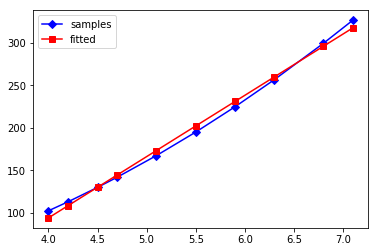

In [32]:

# --------------------------------------------------------------------------------------
# ------------------------------------------ Q2 ----------------------------------------

x = np.asarray([4.00, 4.20, 4.50, 4.70, 5.10, 5.50, 5.90, 6.30, 6.80, 7.10])
y = np.asarray([102.56, 113.18, 130.11, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72])
def rooted_mean_square_error(y,y_hat):
    re = np.mean(np.sum((y - y_hat) ** 2.0))
    return np.sqrt(re)


# Construct the least squares approximation of degree 1 and compute the error
# y_hat = a1 + a2 x
x_bar = np.mean(x)
y_bar = np.mean(y)
xy_bar = np.mean(x*y)
x_square_bar = np.mean(x*x)
w2 = (x_bar * y_bar - xy_bar) / (x_bar ** 2. - x_square_bar)
w1 = y_bar - w2 * x_bar
print(w1,w2)
y_hat = []
for x_i in x:
    y_hat.append(w1 + w2*x_i)
error = rooted_mean_square_error(y,y_hat)
print('rooted mean squared error: %.4f' % error)

import matplotlib.pyplot as plt
plt.plot(x,y,marker='D',color='b',label='samples')
plt.plot(x,y_hat,marker='s',color='r',label='fitted')
plt.legend()

rooted mean squared error: 0.0380


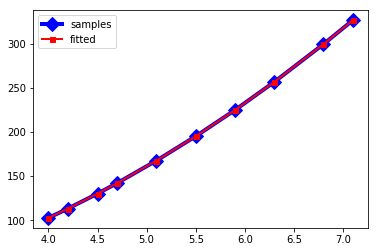

In [33]:
# Construct the least squares approximation of degree 2 and compute the error
# y_hat = a1 + a2 x + a3 x^2
x = np.asarray([4.00, 4.20, 4.50, 4.70, 5.10, 5.50, 5.90, 6.30, 6.80, 7.10])
y = np.asarray([102.56, 113.18, 130.11, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72])
x_bar_1 = np.mean(x)
x_bar_2 = np.mean(x*x)
x_bar_3 = np.mean(x*x*x)
x_bar_4 = np.mean((x*x)*(x*x))
y_bar_1 = np.mean(y)
xy_bar = np.mean(x*y)
x2y_bar = np.mean(x*x*y)
a = np.asarray([[1,x_bar_1,x_bar_2],[x_bar_1,x_bar_2,x_bar_3],[x_bar_2,x_bar_3,x_bar_4]])
b = np.asarray([y_bar_1,xy_bar,x2y_bar])
w = np.linalg.solve(a,b)
y_hat = [w[0]+w[1]*_ + w[2]*_**2. for _ in x]
error = rooted_mean_square_error(y,y_hat)
print('rooted mean squared error: %.4f' % error)

import matplotlib.pyplot as plt
plt.plot(x,y,marker='D',color='b',label='samples',linewidth=4.,markersize=10)
plt.plot(x,y_hat,marker='s',color='r',label='fitted',linewidth=2.,markersize=5)
plt.legend()

In [37]:


# --------------------------------------------------------------------------------------
# ------------------------------------------ Q3 ----------------------------------------


a = np.asarray([[4,1,1,0,0],[-1,-3,1,1,0],[2,1,5,-1,-1],[-1,-1,-1,4,0],[0,2,-1,1,4]])
b = np.asarray([6,6,-6,6,6])
x = np.linalg.solve(a,b)
print(a)
print(b)
print(x)

[[ 4  1  1  0  0]
 [-1 -3  1  1  0]
 [ 2  1  5 -1 -1]
 [-1 -1 -1  4  0]
 [ 0  2 -1  1  4]]
[ 6  6 -6  6  6]
[ 2.4063745  -2.70916335 -0.91633466  1.19521912  2.32669323]


In [38]:
def jacobi_iterative_method(a,b,tol=1e-3,max_iter=25):
    x_true = np.linalg.solve(a,b)
    x = np.zeros(5) # initial guess.
    x_next = np.zeros_like(x)
    error_pre = np.inf  
    print('i        x1          x2            x3         x4          x5         error       ratio')
    for i in range(max_iter):
        x_next[0] = 1./4.  * (b[0] - 1.*x[1] - 1.*x[2] + 0.*x[3] + 0.*x[4])
        x_next[1] = 1./-3. * (b[1] + 1.*x[0] - 1.*x[2] - 1.*x[3] + 0.*x[4])
        x_next[2] = 1./5.  * (b[2] - 2.*x[0] - 1.*x[1] + 1.*x[3] + 1.*x[4])
        x_next[3] = 1./4.  * (b[3] + 1.*x[0] + 1.*x[1] + 1.*x[2] + 0.*x[4])
        x_next[4] = 1./4.  * (b[4] - 0.*x[0] - 2.*x[1] + 1.*x[2] - 1.*x[3])
        error = np.max(np.abs(x_next-x_true))
        ratio = error / error_pre
        print('%02d %.9f %.9f %.9f %.9f %.9f %.9e %.9f' %(i,x[0],x[1],x[2],x[3],x[4],error,ratio))
        x = x_next
        error_pre = error
jacobi_iterative_method(a,b)

i        x1          x2            x3         x4          x5         error       ratio
00 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 9.063745020e-01 0.000000000
01 2.300000000 -2.666666667 -0.986666667 1.161666667 2.296250000 1.063745020e-01 0.117362637
02 2.413333333 -2.746111111 -0.924527778 1.185673611 2.345505208 3.694776450e-02 0.347336663
03 2.417659722 -2.718837963 -0.917060532 1.195440307 2.331293772 1.128522023e-02 0.305437159
04 2.408974624 -2.710198283 -0.916203377 1.195643241 2.327137487 2.600121851e-03 0.230400630
05 2.406600415 -2.709053517 -0.916273317 1.195318395 2.326628831 2.259131073e-04 0.086885585
06 2.406331709 -2.709095543 -0.916324130 1.195228009 2.326659737 6.780316824e-05 0.300129413
07 2.406354918 -2.709150346 -0.916334349 1.195217556 2.326687197 1.958373577e-05 0.288832163
08 2.406371174 -2.709162656 -0.916334988 1.195218383 2.326692985 3.328202024e-06 0.169947249
09 2.406374411 -2.709163672 -0.916334756 1.195218996 2.326693398 3.254252641e-